 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## `Helpful Resources`

- ..\03-Python-Pandas\2\03-Ins_Columns\Solved\\`column_manipulation.ipynb`
- ..\03-Python-Pandas\2\05-Stu_Data_Cleaning\Solved\Challenge\\`spring_cleaning.ipynb`
- ..\03-Python-Pandas\2\11-Stu_Returns\Solved\\`returns_over_date_ranges.ipynb`
- ..\03-Python-Pandas\3\13-Stu_Concat_Dataframes\Solved\\`mastering_concatenation.ipynb`
- ..\03-Python-Pandas\3\15-Ins_Std_Dev_Risk\Solved\\`std_dev_risk.ipynb`
- ..\04-Pandas\1\02-Stu_Correlation\Solved\\`diversification_solved.ipynb`
- ..\04-Pandas\1\03-Ins_Rolling_Statistics\Solved\\`rolling_statistics.ipynb`
- ..\04-Pandas\1\06-Stu_Beta\Solved\\`beta_comparisons.ipynb`
- ..\04-Pandas\1\09-Stu_Portfolio_Planner_Part_II\Solved\\`portfolio_planner_part_2.ipynb`
- [StackOverflow](https://stackoverflow.com/questions/38331568/return-the-column-names-for-a-specific-value-in-a-pandas-dataframe)

## `Useful codes`

`&nbsp;` = # creates a non &nbsp;- &nbsp;breaking space
- print(f'{}\n')
- print(DF.count()) `# count non-null values`
- print(DF.isnull()) `# check for null values`
- print(f'{DF.isnull()}\n')
- print(DF.isnull().sum()) `# count null values`
- print(f'{DF.isnull().sum()}\n')
- print(DF.isnull().sum() / len(DF) * 100) `# percentage of null values`
- print(DF.duplicated()) `# determine existence of duplicate rows`
- pd.concat `# combine CSVs`

- weights = [1/3, 1/3, 1/3]
- returns = DF.dot(weights)
- DF.pct_change() `# daily returns`
- .std() `# standard deviation`

- .plot(figsize=(20,10)) `# plot to graph`
- sharpe_ratios.plot(kind='bar', title='Sharpe Ratios') `# plot Sharpe Ratios to bar graph`
- .np.sqrt(252) `# number of trading days`
- .corr() `# calculates correlation`
- corrDF.style.background_gradient(cmap="summer") `# displays correlation as a table`
- covariance = all_portfolios.roll(window=60).cov(all_portfolios['SP 500']) `# covariance`
- variance
- ewm `# exponentially weighted average`

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whalePath = Path('../Resources/whale_returns.csv')
whaleDF = pd.read_csv(whalePath, index_col="Date", infer_datetime_format=True,parse_dates=True)

whaleDF.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whaleDF.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whaleDF = whaleDF.dropna()
print(whaleDF.isnull().sum(), '\n')
print(whaleDF.dtypes)

whaleDF.head()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64 

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algoPath = Path('../Resources/algo_returns.csv')
algoDF = pd.read_csv(algoPath, index_col="Date", infer_datetime_format=True,parse_dates=True)

algoDF.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algoDF.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algoDF = algoDF.dropna()
print(algoDF.isnull().sum(), '\n')
print(algoDF.dtypes)

algoDF.head()

Algo 1    0
Algo 2    0
dtype: int64 

Algo 1    float64
Algo 2    float64
dtype: object


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data.

In [8]:
# Reading S&P 500 Closing Prices
sp500Path = Path('../Resources/sp500_history.csv')
sp500DF = pd.read_csv(sp500Path, index_col="Date", infer_datetime_format=True,parse_dates=True)
sp500DF.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500DF.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
## spring_cleaning.ipynb
sp500DF['Close'] = sp500DF['Close'].astype('str')
print(sp500DF.dtypes, '\n')

sp500DF['Close'] = sp500DF['Close'].str.replace('$','')
print(sp500DF.head(), '\n')

sp500DF['Close'] = sp500DF['Close'].astype('float')
print(sp500DF.dtypes)

sp500DF.head()

Close    object
dtype: object 

              Close
Date               
2019-04-23  2933.68
2019-04-22  2907.97
2019-04-18  2905.03
2019-04-17  2900.45
2019-04-16  2907.06 

Close    float64
dtype: object
ipykernel_launcher:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [11]:
# Calculate Daily Returns
## returns_over_date_ranges.ipynb
print(sp500DF.dtypes, '\n')

sp500Returns = sp500DF.pct_change()
print(sp500Returns.dtypes)

sp500Returns.head()

Close    float64
dtype: object 

Close    float64
dtype: object


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
print(sp500Returns.isnull().sum(), '\n')

sp500Returns = sp500Returns.dropna()
print(sp500Returns.isnull().sum(), '\n')

print(sp500Returns.dtypes)

sp500Returns.head()

Close    1
dtype: int64 

Close    0
dtype: int64 

Close    float64
dtype: object


,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
# Rename `Close` Column to be specific to this portfolio.
## column_manipulation.ipynb
sp500Returns.rename(inplace=True,columns ={
    'Close': 'S&P 500'
    })
sp500Returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
## mastering_concatenation.ipynb
combinedReturns = pd.concat([whaleDF,algoDF,sp500Returns], axis='columns', join='inner')
combinedReturns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

Calculate and Plot the daily returns.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

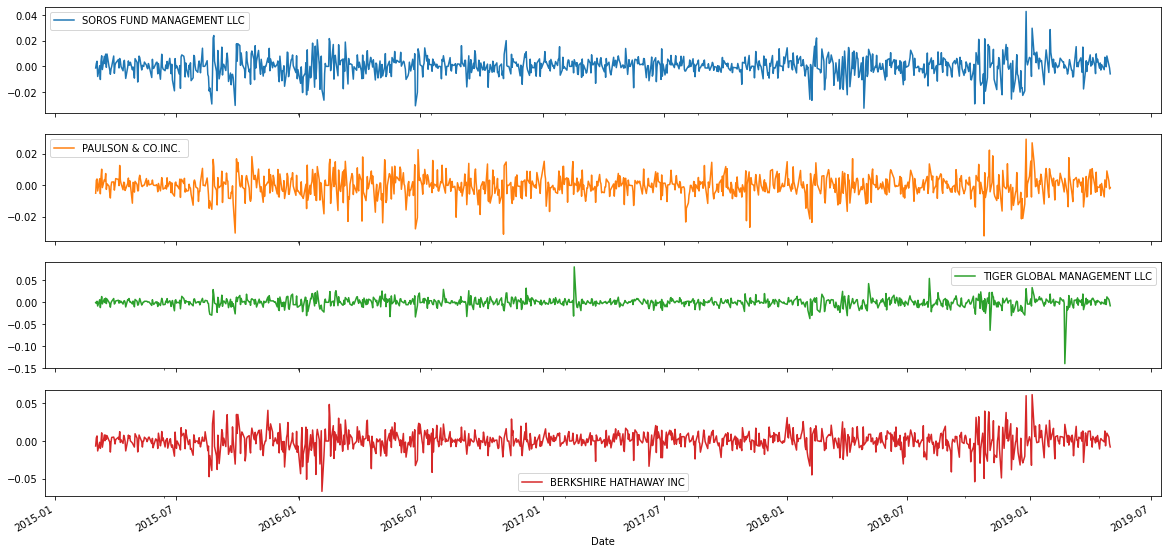

In [15]:
# Plot daily returns of all portfolios
## returns_over_date_ranges.ipynb
whaleDF.plot(figsize=(20,10),subplots=True)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

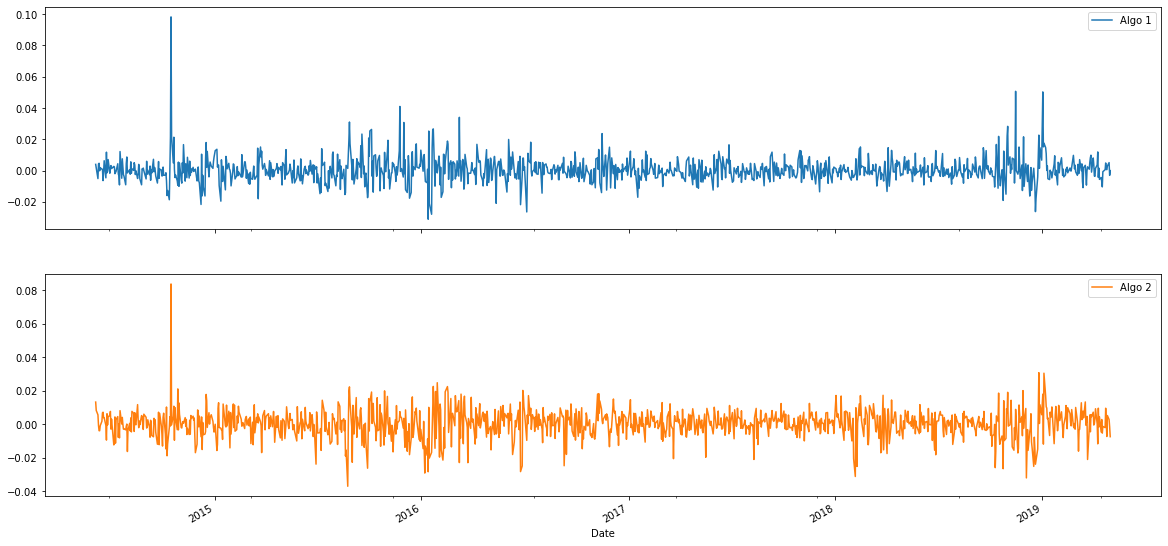

In [16]:
algoDF.plot(figsize=(20,10),subplots=True)

<AxesSubplot:xlabel='Date'>

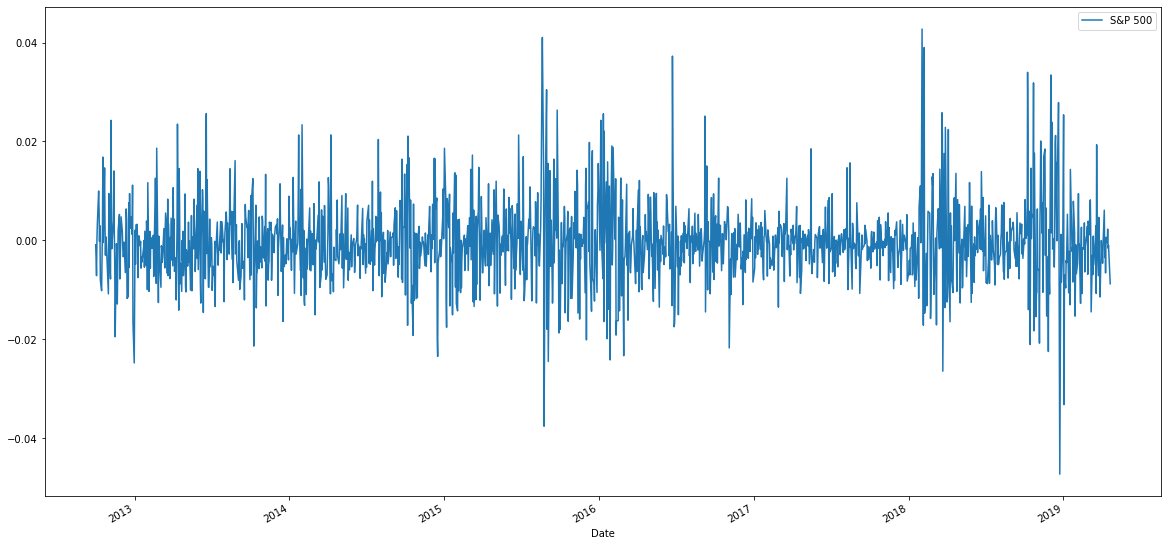

In [17]:
sp500Returns.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [18]:
# Calculate cumulative returns of all portfolios
## portfolio_planner_part_2.ipynb
cumulativeReturns = (1 + combinedReturns).cumprod()
cumulativeReturns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123


<AxesSubplot:xlabel='Date'>

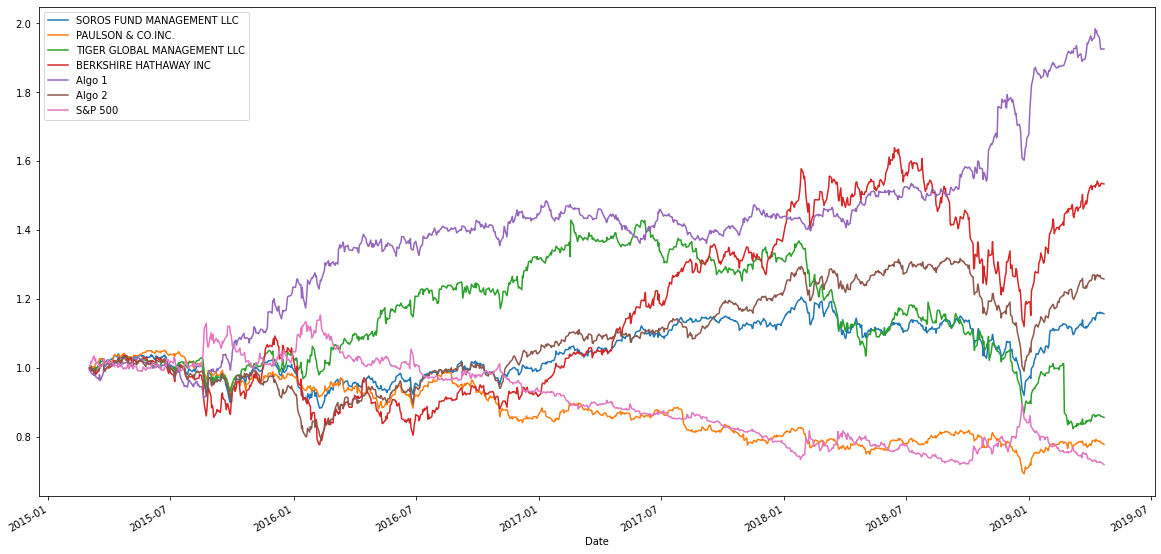

In [19]:
# Plot cumulative returns
cumulativeReturns.plot(figsize=(20,10))

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


SOROS FUND MANAGEMENT LLC         AxesSubplot(0.125,0.125;0.0945122x0.755)
PAULSON & CO.INC.              AxesSubplot(0.238415,0.125;0.0945122x0.755)
TIGER GLOBAL MANAGEMENT LLC    AxesSubplot(0.351829,0.125;0.0945122x0.755)
BERKSHIRE HATHAWAY INC         AxesSubplot(0.465244,0.125;0.0945122x0.755)
Algo 1                         AxesSubplot(0.578659,0.125;0.0945122x0.755)
Algo 2                         AxesSubplot(0.692073,0.125;0.0945122x0.755)
S&P 500                        AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

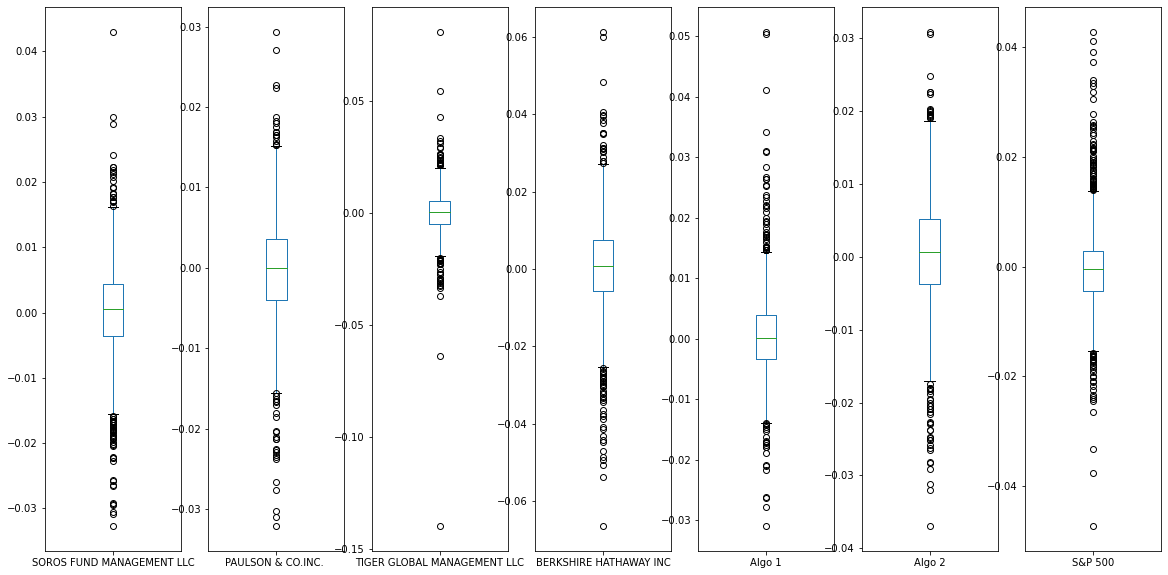

In [20]:
# Box plot to visually show risk
combinedReturns.plot(subplots=True, kind='box', figsize=(20,10))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
## std_dev_risk.ipynb
dailyStd = combinedReturns.std()
dailyStd.head()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate the daily standard deviation of S&P 500
sp500Std = dailyStd['S&P 500']
print(f'Standard Deviation of S&P 500: {sp500Std}\n')

Standard Deviation of S&P 500: 0.00858688974707399



In [23]:
# Determine which portfolios are riskier than the S&P 500
## StackOverflow
print(dailyStd, '\n')

print('--SORTED--')
print(dailyStd.sort_values(ascending=False), '\n')

## Admittedly spent more time here than I should have. Wanted a loop to automate finding the higher deviation, and to print the value and the portfolio (index) name. Ended up finding a solution on StackOverflow that worked with dailyStd being called as a Series.

for index, x in enumerate(dailyStd):
    index = (dailyStd == x).idxmax()
    if x > sp500Std:
        print(index + ': ', x)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64 

--SORTED--
BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64 

TIGER GLOBAL MANAGEMENT LLC:  0.010897305414583355
BERKSHIRE HATHAWAY INC:  0.012918753062201797


### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
annualStd = dailyStd * np.sqrt(252)
annualStd

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

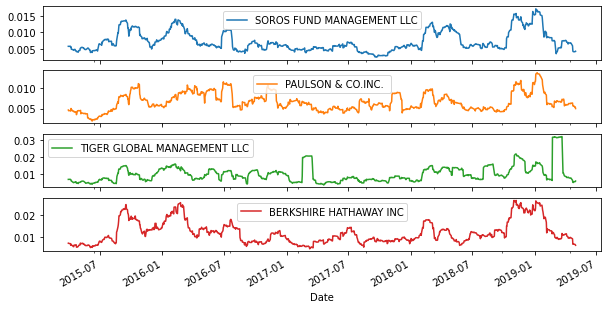

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
## rolling-statistics.ipynb
whaleDF.rolling(window=21).std().plot(subplots=True, figsize=(10,5))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

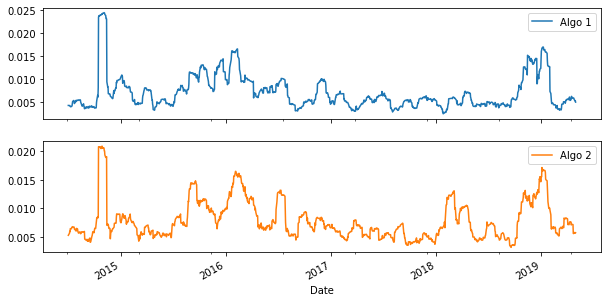

In [26]:
algoDF.rolling(window=21).std().plot(subplots=True, figsize=(10,5))

<AxesSubplot:xlabel='Date'>

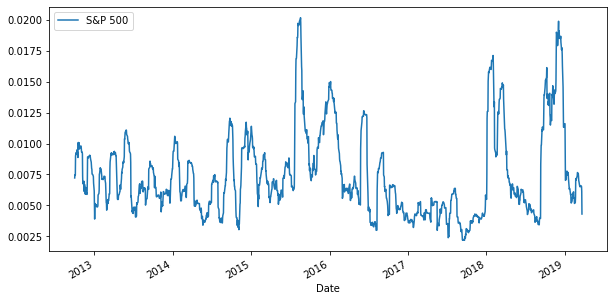

In [27]:
sp500Returns.rolling(window=21).std().plot(figsize=(10,5))

### Calculate and plot the correlation

In [28]:
# Calculate the correlation
## correlation-01.ipynb
correlation = combinedReturns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

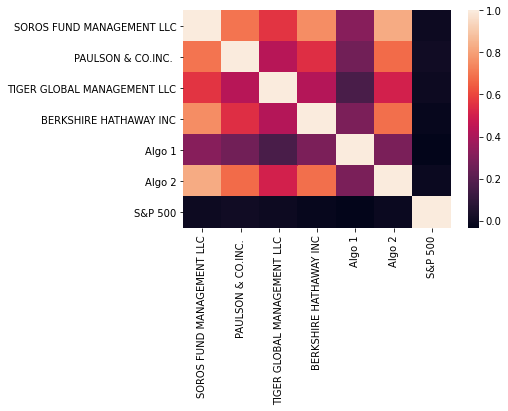

In [29]:
# Display the correlation matrix
sns.heatmap(correlation)

<AxesSubplot:>

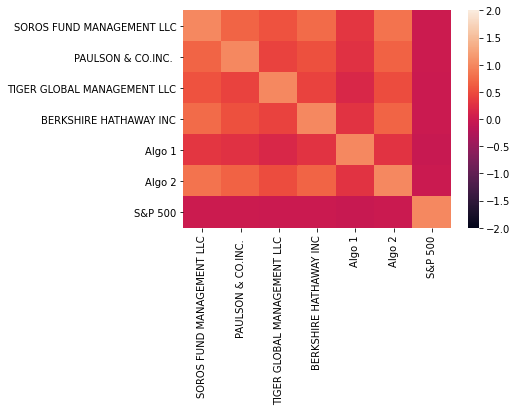

In [30]:
sns.heatmap(correlation, vmin=-2, vmax=2)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [31]:
# Calculate covariance of a single portfolio
## beta_comparisons.ipynb
sorosCov = combinedReturns['SOROS FUND MANAGEMENT LLC'].cov(combinedReturns['S&P 500'])
print(f'Soros Covariance:\n{sorosCov}\n')

# Calculate variance of S&P 500
variance = combinedReturns['S&P 500'].var()
print(f'S&P 500 Variance:\n{variance}\n')

# Computing beta
sorosBeta = sorosCov / variance
print(f'Soros Beta:\n{sorosBeta}')

Soros Covariance:
3.8897269830620516e-08

S&P 500 Variance:
7.373467552840441e-05

Soros Beta:
0.0005275302230852882


In [32]:
# Plot beta trend
ax = sorosBeta.plot(title='Beta of Soros Fund Management LLC')

AttributeError: 'numpy.float64' object has no attribute 'plot'

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [33]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [34]:
# Annualized Sharpe Ratios


In [35]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [36]:
# Reading data from 1st stock: GOOG
googPath = Path('../Resources/goog_historical.csv')
googDF = pd.read_csv(googPath)

print(f'{googDF.head()}\n')

  Symbol Trade DATE     NOCP
0   GOOG   5/9/2019  1162.38
1   GOOG   5/8/2019  1166.27
2   GOOG   5/7/2019  1174.10
3   GOOG   5/6/2019  1189.39
4   GOOG   5/3/2019  1185.40



In [37]:
# Reading data from 2nd stock: AAPL
aaplPath = Path('../Resources/aapl_historical.csv')
aaplDF = pd.read_csv(aaplPath)

print(f'{aaplDF.head()}\n')

  Symbol Trade DATE    NOCP
0   AAPL   5/9/2019  200.72
1   AAPL   5/8/2019  202.90
2   AAPL   5/7/2019  202.86
3   AAPL   5/6/2019  208.48
4   AAPL   5/3/2019  211.75



In [38]:
# Reading data from 3rd stock: COST
costPath = Path('../Resources/cost_historical.csv')
costDF = pd.read_csv(costPath)

print(f'{costDF.head()}\n')

  Symbol Trade DATE    NOCP
0   COST   5/9/2019  243.47
1   COST   5/8/2019  241.34
2   COST   5/7/2019  240.18
3   COST   5/6/2019  244.23
4   COST   5/3/2019  244.62



In [39]:
# Combine all stocks in a single DataFrame


In [40]:
# Reset Date index


In [41]:
# Reorganize portfolio data by having a column per symbol


In [42]:
# Calculate daily returns

# Drop NAs
print(f'{aaplDF.isnull().sum()}\n')
print(f'{costDF.isnull().sum()}\n')
print(f'{googDF.isnull().sum()}\n')

# Display sample data


Symbol        0
Trade DATE    0
NOCP          0
dtype: int64

Symbol        0
Trade DATE    0
NOCP          0
dtype: int64

Symbol        0
Trade DATE    0
NOCP          0
dtype: int64



## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [43]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [44]:
# Join your returns DataFrame to the original returns DataFrame


In [45]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [46]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [47]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [48]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [49]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [50]:
# Calculate Annualzied Sharpe Ratios


In [51]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!